# Transporte Quântico Mesoscópico

## Quantum Matter - Materials & Concepts Summer School 2021

### Sessão prática

## 1. Cálculo de auto-energia de contacto semi-infinito

Consideremos o Hamiltononiano de um contacto semi-infinito, descrito pelo Hamiltoniano

$$
H_{\text{semi}}=\left[\begin{array}{cccc}
\boldsymbol{h} & \boldsymbol{v}\\
\boldsymbol{v}^{\dagger} & \boldsymbol{h} & \boldsymbol{v}\\
 & \boldsymbol{v}^\dagger & \ddots & \ddots\\
 & \ddots
\end{array}\right]
$$

Para definir este contacto, basta-nos definir as matrizes $\boldsymbol{h}$ e $\boldsymbol{v}$.

Para conveniência definimos um objecto que guarda essas quantidades:

In [1]:
struct SemiInfiniteLead{Th, Tv}
    h::Th
    v::Tv
end

mat(x::Number) = fill(x, 1, 1)
mat(A::AbstractMatrix) = A
SemiInfiniteLead(e::Number, t::Number) = SemiInfiniteLead(mat(e), mat(t))

dimh(lead::SemiInfiniteLead) = size(lead.h, 2)
;

### 1.1. Estrutura de bandas

Antes de calcularmos a auto-energia devido ao contacto, vamos calcular a estrutura de bandas do contacto.

O Hamiltoniano do contacto infinito é dado por

$$
H_{\text{infinito}}=\left[\begin{array}{cccccc}
 & \ddots\\
\ddots & \ddots & \boldsymbol{v}\\
 & \boldsymbol{v}^{\dagger} & \boldsymbol{h} & \boldsymbol{v}\\
 &  & \boldsymbol{v}^{\dagger} & \boldsymbol{h} & \boldsymbol{v}\\
 &  &  & \boldsymbol{v}^{\dagger} & \ddots & \ddots\\
 &  &  &  & \ddots
\end{array}\right].
$$

Para calcular a estrutura de bandas, devemos resolver o problema de valores próprios:

$$
\left(\boldsymbol{h}+e^{ik}\boldsymbol{v}+e^{-ik}\boldsymbol{v}^{\dagger}\right)\Psi_{k}=E_{k}\Psi_{k}.
$$

Vamos então calcular a estrutura de bandas. Antes de mais vamos importar o pactote que nos permitirá resolver problemas de algebra linear, `LinearAlgebra`.

In [2]:
using LinearAlgebra

Vamos agora definir a função que irá calcular a estrutura de bandas:

In [3]:
function bandstructure(lead::SemiInfiniteLead, kpts)
    
    nbands = dimh(lead)
    bands = zeros(nbands, length(kpts))
    
    for (i, k) in enumerate(kpts)
        hk = lead.h + cis(k)*lead.v + cis(-k)*lead.v' # cis(x) = exp(i x)
    
        energies = eigvals(hk)
        
        for n in 1:nbands
            bands[n, i] = energies[n]
        end
        
    end
    
    return bands

end

bandstructure (generic function with 1 method)

Vamos considerar uma cadeia 1D com uma orbital por célula unitária. O Hamiltoniano do sistema infinito é:

$$
H_{\text{chain}}=\left[\begin{array}{cccccc}
 & \ddots\\
\ddots & \ddots & -1\\
 & -1 & 0 & -1\\
 &  & -1 & 0 & -1\\
 &  &  & -1 & \ddots & \ddots\\
 &  &  &  & \ddots
\end{array}\right]
$$

Definimos então o sistema como:

In [4]:
chain = SemiInfiniteLead(0.0, -1.0)

SemiInfiniteLead{Matrix{Float64}, Matrix{Float64}}([0.0], [-1.0])

Vamos estudar a estrutura de bandas:

In [5]:
kpts = range(-pi, pi, length = 100)
bandas = bandstructure(chain, kpts)

1×100 Matrix{Float64}:
 2.0  1.99597  1.98391  1.96386  1.9359  …  1.96386  1.98391  1.99597  2.0

Vamos fazer o plot da estrutura de bandas. Para isso, vamos importar instalar e depois importar um pacote para criar gráficos: 
(isto pode demorar um pouco)

In [7]:
using GLMakie

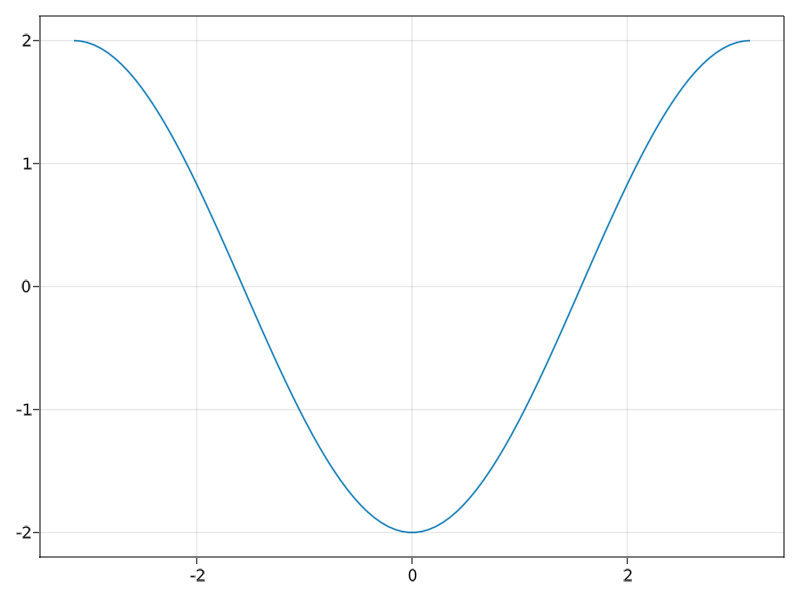

In [8]:
lines(kpts, bandas[1, :]) # o primeiro plot vai demorar algum tempo a criar devido à compilação de algumas bibliotecas

### 1.2. Calculo recursivo da função de Green de superfície

Vamos agora calcular a auto-energia do contacto semi-infinito. 

Vimos que isto podia ser feito calculando a função de Green:

$$
\left[\begin{array}{cccc}
E-\boldsymbol{h} & -\boldsymbol{v}\\
-\boldsymbol{v}^{\dagger} & E-\boldsymbol{h} & -\boldsymbol{v}\\
 & -\boldsymbol{v}^{\dagger} & \ddots & \ddots\\
 &  & \ddots
\end{array}\right]\left[\begin{array}{cccc}
\boldsymbol{g}_{1,1}^{R} & \boldsymbol{g}_{1,2}^{R} & \boldsymbol{g}_{1,3}^{R} & \cdots\\
\boldsymbol{g}_{2,1}^{R} & \boldsymbol{g}_{2,2}^{R} & \boldsymbol{g}_{2,3}^{R} & \cdots\\
\boldsymbol{g}_{3,1}^{R} & \boldsymbol{g}_{3,2}^{R} & \boldsymbol{g}_{3,3}^{R} & \cdots\\
\vdots & \vdots & \vdots & \ddots
\end{array}\right]=\left[\begin{array}{cccc}
\boldsymbol{1}\\
 & \boldsymbol{1}\\
 &  & \boldsymbol{1} & \ddots\\
 &  & \ddots & \ddots
\end{array}\right]
$$

Podemos ver o problema de um contacto semi-infinito, como um sítio conectado a um contacto semi-infinito. E tratamos a conexão, entre o primeiro sítio e o resto do contacto como uma perturbação. Podemos então escrever a equação de Dyson:

$$
\begin{align*}
\boldsymbol{g}^{R} & =\tilde{\boldsymbol{g}}^{R}+\tilde{\boldsymbol{g}}^{R}\cdot\boldsymbol{V}\cdot\boldsymbol{g}^{R}\\
\boldsymbol{g}^{R} & =\tilde{\boldsymbol{g}}^{R}+\boldsymbol{g}^{R}\cdot\boldsymbol{V}\cdot\tilde{\boldsymbol{g}}^{R}
\end{align*}
$$

Onde:
$$
\tilde{\boldsymbol{g}}^{R}=\left[\begin{array}{cccc}
E-\boldsymbol{h} & \boldsymbol{0}\\
\boldsymbol{0} & E-\boldsymbol{h} & -\boldsymbol{v}\\
 & -\boldsymbol{v}^{\dagger} & \ddots & \ddots\\
 &  & \ddots
\end{array}\right]^{-1}
$$

é a função de Green para o sistema em que o primeiro sítio está desconectado do resto do contacto e
$$
\boldsymbol{V}=\left[\begin{array}{cccc}
\boldsymbol{0} & \boldsymbol{v}\\
\boldsymbol{v}^{\dagger} & \boldsymbol{0} & \boldsymbol{0}\\
 & \boldsymbol{0} & \boldsymbol{0} & \ddots\\
 &  & \ddots & \ddots
\end{array}\right]
$$

liga o primeiro sítio ao resto do contacto.

A partir daqui obtemos as seguintes relações:
$$
\begin{align*}
\boldsymbol{g}_{1,1}^{R} & =\tilde{\boldsymbol{g}}_{1,1}^{R}+\tilde{\boldsymbol{g}}_{1,1}^{R}\cdot\boldsymbol{V}_{1,2}\cdot\boldsymbol{g}_{2,1}^{R}\\
\boldsymbol{g}_{2,1}^{R} & =\tilde{\boldsymbol{g}}_{2,2}^{R}\cdot\boldsymbol{V}_{2,1}\cdot\boldsymbol{g}_{1,1}^{R}
\end{align*}
$$
De onde obtemos a equação:
$$
\boldsymbol{g}_{1,1}^{R}=\left[E-\boldsymbol{h}-\boldsymbol{v}\cdot\tilde{\boldsymbol{g}}_{2,2}^{R}\cdot\boldsymbol{v}^{\dagger}\right]^{-1}
$$

Parece que não avançamos muito, porque não sabemos calcular $\tilde{\boldsymbol{g}}^R_{2,2}$. No entanto, $\tilde{\boldsymbol{g}}^R_{2,2}$ é exactamente a quantidade que queremos calcular: a função de Green de um contacto semi-infinito, avaliada na fronteira do contacto. Logo, temos que $$\tilde{\boldsymbol{g}}^R_{2,2} = \boldsymbol{g}^R_{1,1}$$

e obtemos a seguinte equação auto-consistente:
$$
\boldsymbol{g}_{1,1}^{R}=\left[E-\boldsymbol{h}-\boldsymbol{v}\cdot\boldsymbol{g}_{1,1}^{R}\cdot\boldsymbol{v}^{\dagger}\right]^{-1}
$$

Que podemos usar para calcular a função de Green do contacto:

In [9]:
function recursive_leadgreensfunction(lead::SemiInfiniteLead, energy; niter = 100, eta = 0.01)
    # niter is the number of interations
    # 
    gold = inv((energy + eta*im)*I - lead.h)
    gnew = inv((energy + eta*im)*I - lead.h - lead.v*gold*lead.v')
    
    for n in 1:niter
        gold = gnew
        gnew = inv((energy + eta*im)*I - lead.h - lead.v*gold*lead.v')
    end
    
    return gnew
end

recursive_leadgreensfunction (generic function with 1 method)

In [10]:
Es = range(-2.5, 2.5, length = 500)
gf = [recursive_leadgreensfunction(chain, E; niter = 1000, eta = 0.01) for E in Es]
;

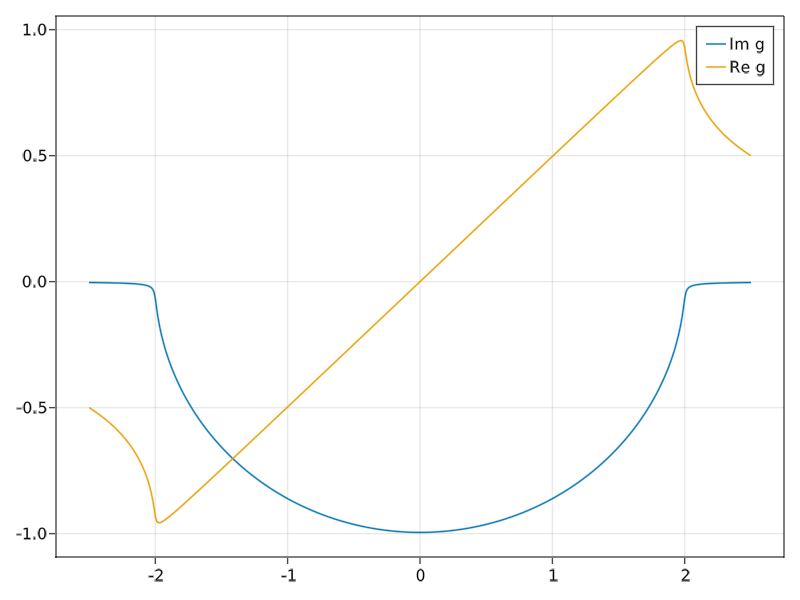

In [11]:
lines(Es, [imag(g[1,1]) for g in gf], label = "Im g")
lines!(Es, [real(g[1,1]) for g in gf], label = "Re g")
axislegend()
current_figure()

Este resultado numérico pode ser comparado com a solução analítica, que é conhecida. 

Sendo que para a cadeia 1D, $\boldsymbol{h}=\epsilon_0$ e $\boldsymbol{v}=-t$, podemos resolver a equação autoconsistente:

$$\left(E-\epsilon_{0}-t^{2}g\right)g=1$$

Cuja solução é dada por:

$$g = \frac{1}{t}\left[\left(\frac{E-\epsilon_{0}}{2t}\right)\pm\sqrt{\left(\frac{E-\epsilon_{0}}{2t}\right)^{2}-1}\right]$$.

O sinal $\pm$ é determinado, pela condição que para funções retardadas a parte imaginária deve ser negativa (deve ser uma densidade de estados). Desta forma obtemos:



In [16]:
t = 1
ϵ0 = 0
function gr(E)
    
    y = (E-ϵ0)/(2t)
    if -1<y<1 
        return (y - im*sqrt(1-y^2))/t
    else
        return (y - sign(y)*sqrt(y^2-1))/t + 0im
    end
end
;

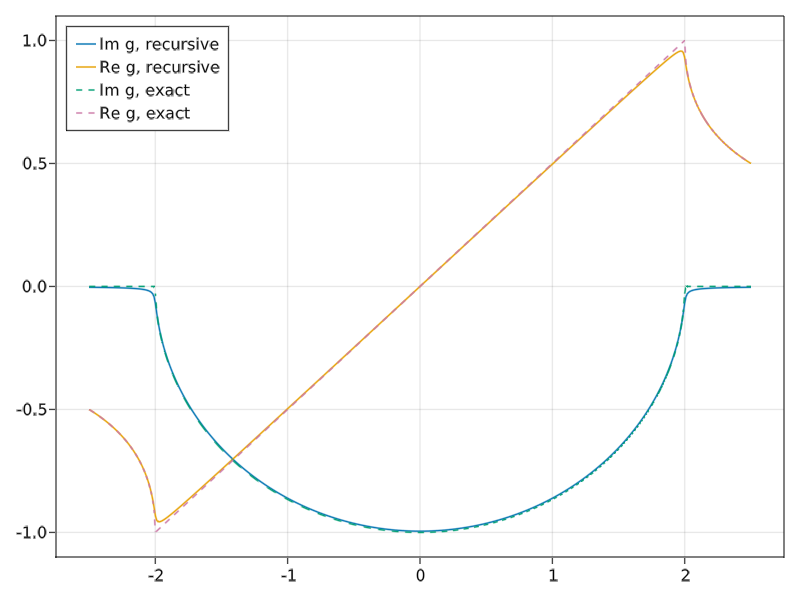

In [17]:
lines(Es, [imag(g[1,1]) for g in gf], label = "Im g, recursive")
lines!(Es, [real(g[1,1]) for g in gf], label = "Re g, recursive")

lines!(Es, [imag(gr(E)) for E in Es], label = "Im g, exact", linestyle = :dash)
lines!(Es, [real(gr(E)) for E in Es], label = "Re g, exact", linestyle = :dash)
axislegend(position = :lt)
current_figure()

### 1.3. Cálculo de estados propagantes para o contacto infinito

Vamos agora calcular os estados propagantes. Para isso vamos começar por definir uma função que constroi o problema de valores próprios generalizado:

$$
\left[\begin{array}{cc}
\boldsymbol{0} & \boldsymbol{1}\\
-\boldsymbol{v}^{\dagger} & \left(E-\boldsymbol{h}\right)
\end{array}\right]\left[\begin{array}{c}
\Psi_{n-1}\\
\Psi_{n}
\end{array}\right]=\lambda\left[\begin{array}{cc}
\boldsymbol{1} & \boldsymbol{0}\\
\boldsymbol{0} & \boldsymbol{v}
\end{array}\right]\left[\begin{array}{c}
\Psi_{n-1}\\
\Psi_{n}
\end{array}\right]
$$,

e depois calcula os valores próprios. Recordar que os valores próprios tem a forma:
$$
\left[\begin{array}{c}
\Psi_{n-1}\\
\Psi_{n}
\end{array}\right]
$$

Vamos escolher a seguinte normalização: $\Psi^{\dagger}\cdot\Psi=1$. 

Se seguida, vamos garantir que os vectores próprios, diagonalizam o operador de corrente:

$$
\left\langle \Psi_{\alpha}\left|I\right|\Psi_{\beta}\right\rangle =i\Psi_{\alpha}^{\dagger}\left(\lambda_{\beta}\boldsymbol{v}-\lambda_{\alpha}^{*}\boldsymbol{v}^{\dagger}\right)\Psi_{\beta}
$$

Vamos ordenar os estados de por ordem decrescente de velocidades (e em seguida por ordem crescente de $\lambda$), de forma a que primeiro surjam os estados que se propagam para o interior do contacto, e logo, para fora do dispositivo central (outgoing states). 

In [12]:
function generalized_eigenproblem(lead::SemiInfiniteLead, energy)
    n = dimh(lead)
    T = promote_type(eltype(lead.h), eltype(lead.v)) #determine type of matrix
    
    A = [
        zeros(T, n, n) Matrix{T}(I, n, n);
        -lead.v' energy*I - lead.h
    ]
    
    B = [
        Matrix{T}(I, n, n) zeros(T, n, n);
        zeros(T, n, n) lead.v
    ]
    
    return A, B
end

generalized_eigenproblem (generic function with 1 method)

In [13]:
Matrix{Float64}(undef, 2, 3)

2×3 Matrix{Float64}:
 0.0       6.92018e-310  5.0e-324
 5.0e-324  1.0e-323      6.92018e-310

In [14]:
function leadstates(lead::SemiInfiniteLead, energy)
    n = dimh(lead)
    
    A, B = generalized_eigenproblem(lead, energy)

    λs, Ψs = eigen(A, B)
    
    # identify 0 and inf eigenvalues
    idxs_good = Int[]
    idxs_0 = Int[]
    idxs_inf = Int[]
    for (i, λ) in enumerate(λs)
        if abs(λ) == 0
            push!(idxs_0, i)
        elseif abs(λ) == Inf
            push!(idxs_inf, i)
        else
            push!(idxs_good, i)
        end
    end
    
    ngood = length(idxs_good)÷2
    nbad = n - ngood

    # normalize states
    for α in 1:2*n
        normalization = norm(Ψs[1:n, α])
        Ψs[:, α] ./= normalization
    end
        
    # build current operator
    J = zeros(ComplexF64, 2*ngood, 2*ngood)
    for β in 1:2*ngood
        for α in 1:2*ngood
            J[α, β] = im*Ψs[1:n, idxs_good[α]]'*(λs[idxs_good[β]]*lead.v - conj(λs[idxs_good[α]])*lead.v')*Ψs[1:n, idxs_good[β]]
        end
    end

    # diagonalize current operator
    velocities, vecs = eigen(Hermitian(J))
    
    Ψs_good = Ψs[:, idxs_good]*vecs
    λs_good = λs[idxs_good]
    
    # outgoing states: positive velocity, |λ| <= 1
    λs_out = Vector{complex(eltype(λs))}(undef, n)
    Ψs_out = Matrix{complex(eltype(Ψs))}(undef, n, n)
    
    # incoming states: negative velocity, |λ| >= 1
    λs_in = Vector{complex(eltype(λs))}(undef, n)
    Ψs_in = Matrix{complex(eltype(Ψs))}(undef, n, n)
    
    # insert good states by order of (|lambda|, -velocity)
    p = sortperm(collect(zip(velocities, λs_good)), by = x -> (abs2(x[2]), -x[1]))

    for i in 1:ngood
        Ψs_out[:, i] = Ψs_good[1:n, p[i]]
        λs_out[i] = λs_good[p[i]]
        
        Ψs_in[:, i] = Ψs_good[1:n, p[i + ngood]]
        λs_in[i] = λs_good[p[i + ngood]]
        
    end
    
    # insert bad states, first 0, then inf
    for i in 1:nbad
        Ψs_out[:, i + ngood] = Ψs[1:n, idxs_0[i]]
        λs_out[i + ngood] = λs[idxs_0[i]]
        
        Ψs_in[:, i + ngood] = Ψs[1:n, idxs_inf[i]]
        λs_in[i + ngood] = λs[idxs_inf[i]]
    end
    
    # return sorted lambdas, states and velocitites
    return λs_out, Ψs_out, velocities[p[1:n]], λs_in, Ψs_in, velocities[p[n+1:end]]

end

leadstates (generic function with 1 method)

Vamos usar esta função para a cadeia 1D e fazer a comparação com os resultados analíticos:

$$
\begin{align*}
\lambda=e^{\pm ik} & =\cos k\pm i\sin k\\
 & =-\frac{E}{2t}\pm i\sqrt{1-\left(\frac{E}{2t}\right)^{2}}
\end{align*}
$$

e 
$$
v=2t\sin k=2t\sqrt{1-\left(\frac{E}{2t}\right)^{2}}
$$

In [15]:
λ_analytic(E) = [-E/2 + im*sqrt(1-(E/2)^2), -E/2 - im*sqrt(1-(E/2)^2)]
vel_analytic(E) = [2*sqrt(1-(E/2)^2), -2*sqrt(1-(E/2)^2)];

In [16]:
energy = -0.2
λs_out, states_out, velocities_out, λs_in, states_in, velocities_in  = leadstates(chain, energy)

(ComplexF64[0.10000000000000002 + 0.99498743710662im], ComplexF64[1.0 + 0.0im], [1.98997487421324], ComplexF64[0.10000000000000002 - 0.99498743710662im], ComplexF64[-1.0 + 0.0im], [-1.98997487421324])

In [17]:
states_in

1×1 Matrix{ComplexF64}:
 -1.0 + 0.0im

In [18]:
[λs_out[1], λs_in[1]]

2-element Vector{ComplexF64}:
 0.10000000000000002 + 0.99498743710662im
 0.10000000000000002 - 0.99498743710662im

In [19]:
λ_analytic(energy)

2-element Vector{ComplexF64}:
 0.1 + 0.99498743710662im
 0.1 - 0.99498743710662im

In [20]:
[velocities_out[1], velocities_in[1]]

2-element Vector{Float64}:
  1.98997487421324
 -1.98997487421324

In [21]:
vel_analytic(energy)

2-element Vector{Float64}:
  1.98997487421324
 -1.98997487421324

### 1.4. Cálculo da função de Green do contacto, usando os estados propagantes

Agora que sabemos calcular os estados propagantes, vamos usá-los para expressar a 

In [31]:
function lead_selfenergy_eigen(lead::SemiInfiniteLead, λs_out, states_out, ngood)
    
    return lead.v*states_out[:, 1:ngood]*Diagonal(λs_out[1:ngood])*(inv(states_out)[1:ngood, :])
    
end

function lead_selfenergy_eigen(lead::SemiInfiniteLead, energy)
    
    λs_out, states_out, velocities_out, λs_in, states_in, velocities_in  = leadstates(lead, energy)
    
    ngood = length(velocities_out)
    
    return lead_selfenergy_eigen(lead, λs_out, states_out, ngood)
end

lead_selfenergy_eigen (generic function with 2 methods)

In [32]:
λs_out, states_out, velocities_out, λs_in, states_in, velocities_in = leadstates(chain, 0.5)

(ComplexF64[-0.25 + 0.9682458365518543im], ComplexF64[1.0 + 0.0im], [1.9364916731037085], ComplexF64[-0.25 - 0.9682458365518543im], ComplexF64[-1.0 + 0.0im], [-1.9364916731037085])

In [33]:
ABchain = SemiInfiniteLead([0 -1; -1 0], [0 0; -1 0])

SemiInfiniteLead{Matrix{Int64}, Matrix{Int64}}([0 -1; -1 0], [0 0; -1 0])

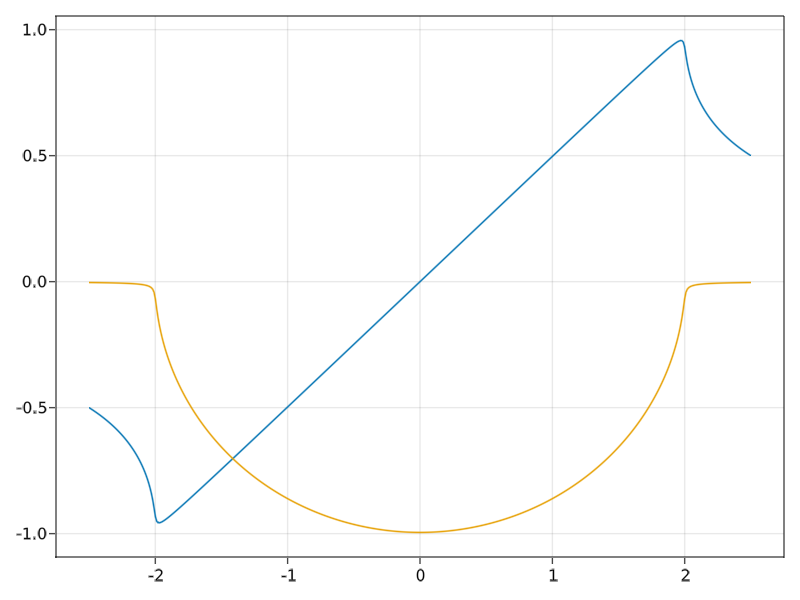

In [40]:
Es = range(-2.5, 2.5, length = 500)
gf = [lead_selfenergy_eigen(chain, E + 0.01im) for E in Es]

lines(Es, [real(g[1,1]) for g in gf])
lines!(Es, [imag(g[1,1]) for g in gf])
current_figure()

In [41]:
Es = range(-2.5, 2.5, length = 500)
gf = [lead_selfenergy_eigen(ABchain, E + 0.01im) for E in Es]
;

LoadError: DimensionMismatch("A has dimensions (4,3) but B has dimensions (2,2)")

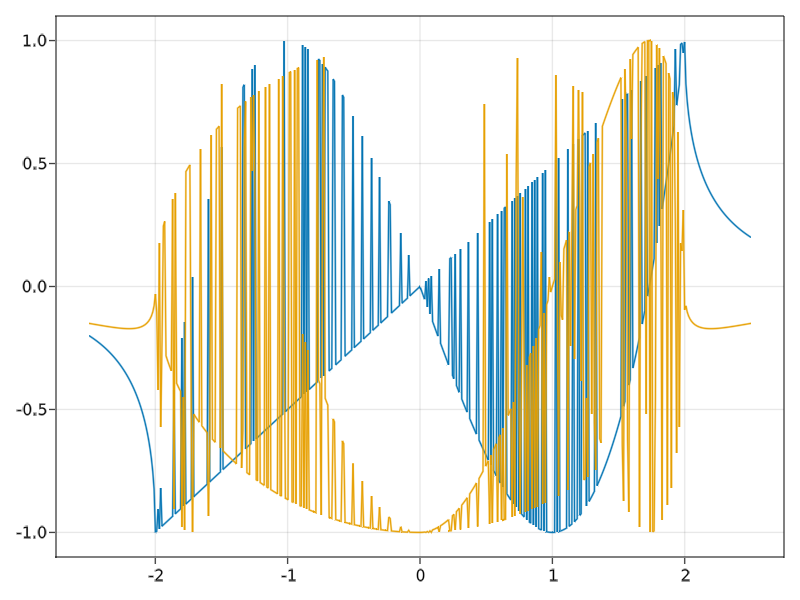

In [37]:
lines(Es, [real(g[2,2]) for g in gf])
lines!(Es, [imag(g[2,2]) for g in gf])
current_figure()

## 2. Exemplos

In [137]:
λs_out, states_out, velocities_out, λs_in, states_in, velocities_in  = leadstates(ABchain, energy)

(ComplexF64[-0.9800000000000002 - 0.19899748742132406im, 0.0 + 0.0im], ComplexF64[0.6754198694145738 + 0.20930360723121927im 1.0 + 0.0im; -0.14071247279470292 + 0.6929646455628163im 0.0 + 0.0im], [0.9949874371066205, -0.9949874371066203], ComplexF64[-0.9800000000000003 + 0.19899748742132406im, Inf + NaN*im], ComplexF64[0.20930360723121927 + 0.6754198694145738im 0.0 + 0.0im; 0.6929646455628163 - 0.14071247279470292im -1.0 + 0.0im], Float64[])

In [138]:
λs_out

2-element Vector{ComplexF64}:
 -0.9800000000000002 - 0.19899748742132406im
                 0.0 + 0.0im

In [139]:
states_out

2×2 Matrix{ComplexF64}:
   0.67542+0.209304im  1.0+0.0im
 -0.140712+0.692965im  0.0+0.0im

In [157]:
ABchain.v*states_out*Diagonal(λs_out)*inv(states_out)

2×2 Matrix{ComplexF64}:
 0.0+0.0im   -0.0+0.0im
 0.0+0.0im  0.296-0.955188im

In [158]:
ABchain.v*states_out[:, 1:1]*Diagonal(λs_out[1:1])*pinv(states_out[:, 1:1])

2×2 Matrix{ComplexF64}:
  0.0+0.0im          0.0+0.0im
 0.49+0.0994987im  0.148-0.477594im

In [156]:
A, B = generalized_eigenproblem(ABchain, 0.2)

([0.0 0.0 1.0 0.0; 0.0 0.0 0.0 1.0; 0.0 1.0 0.2 1.0; 0.0 0.0 1.0 0.2], [1 0 0 0; 0 1 0 0; 0 0 0 0; 0 0 -1 0])

In [78]:
A*vecs[:, 2]

4-element Vector{ComplexF64}:
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im

In [79]:
B*vecs[:, 2]

4-element Vector{ComplexF64}:
 1.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im

In [80]:
A*vecs[:, 4]

4-element Vector{ComplexF64}:
                  -0.75 + 0.0im
  -6.755399441055742e15 + 0.0im
  -6.755399441055743e15 + 0.0im
 -1.3510798882111492e15 + 0.0im

In [81]:
B*vecs[:, 4]

4-element Vector{ComplexF64}:
  0.0 + 0.0im
 -1.0 + 0.0im
  0.0 + 0.0im
 0.75 + 0.0im

In [88]:
psi = vecs[1:2, 1:2]

Ipsi = inv(psi)

Ipsi[1, :]

2-element Vector{ComplexF64}:
                 0.0 + 1.1102230246251565e-16im
 -0.6846531968814576 + 1.2374368670764584im

In [92]:
Ipsi*psi

2×2 Matrix{ComplexF64}:
 1.0+5.40135e-17im  0.0+1.11022e-16im
 0.0+5.55112e-17im  1.0+2.77556e-17im

In [93]:
dot(Ipsi[1, :]', psi[:, 1])

1.0 + 5.401347173293954e-17im

In [94]:
Ipsi[1, :]'

1×2 adjoint(::Vector{ComplexF64}) with eltype ComplexF64:
 0.0-1.11022e-16im  -0.684653-1.23744im

In [96]:
psi[:, 1]

2-element Vector{ComplexF64}:
 -0.5134898976610933 + 0.48613591206575146im
 -0.3423265984407287 - 0.6187184335382291im

In [89]:
pinv(psi[:, 1])

1×2 adjoint(::Vector{ComplexF64}) with eltype ComplexF64:
 -0.51349-0.486136im  -0.342327+0.618718im

In [90]:
round.(vecs[1:2, 1:2] |> inv, digits = 2)

2×2 Matrix{ComplexF64}:
 0.0+0.0im  -0.68+1.24im
 1.0+0.0im   0.25+0.97im

In [85]:
? round

search: round rounding RoundUp RoundDown RoundToZero RoundingMode RoundNearest



```
round(z::Complex[, RoundingModeReal, [RoundingModeImaginary]])
round(z::Complex[, RoundingModeReal, [RoundingModeImaginary]]; digits=, base=10)
round(z::Complex[, RoundingModeReal, [RoundingModeImaginary]]; sigdigits=, base=10)
```

Return the nearest integral value of the same type as the complex-valued `z` to `z`, breaking ties using the specified [`RoundingMode`](@ref)s. The first [`RoundingMode`](@ref) is used for rounding the real components while the second is used for rounding the imaginary components.

# Example

```jldoctest
julia> round(3.14 + 4.5im)
3.0 + 4.0im
```

---

```
round([T,] x, [r::RoundingMode])
round(x, [r::RoundingMode]; digits::Integer=0, base = 10)
round(x, [r::RoundingMode]; sigdigits::Integer, base = 10)
```

Rounds the number `x`.

Without keyword arguments, `x` is rounded to an integer value, returning a value of type `T`, or of the same type of `x` if no `T` is provided. An [`InexactError`](@ref) will be thrown if the value is not representable by `T`, similar to [`convert`](@ref).

If the `digits` keyword argument is provided, it rounds to the specified number of digits after the decimal place (or before if negative), in base `base`.

If the `sigdigits` keyword argument is provided, it rounds to the specified number of significant digits, in base `base`.

The [`RoundingMode`](@ref) `r` controls the direction of the rounding; the default is [`RoundNearest`](@ref), which rounds to the nearest integer, with ties (fractional values of 0.5) being rounded to the nearest even integer. Note that `round` may give incorrect results if the global rounding mode is changed (see [`rounding`](@ref)).

# Examples

```jldoctest
julia> round(1.7)
2.0

julia> round(Int, 1.7)
2

julia> round(1.5)
2.0

julia> round(2.5)
2.0

julia> round(pi; digits=2)
3.14

julia> round(pi; digits=3, base=2)
3.125

julia> round(123.456; sigdigits=2)
120.0

julia> round(357.913; sigdigits=4, base=2)
352.0
```

!!! note
    Rounding to specified digits in bases other than 2 can be inexact when operating on binary floating point numbers. For example, the [`Float64`](@ref) value represented by `1.15` is actually *less* than 1.15, yet will be rounded to 1.2.

    # Examples

    ```jldoctest; setup = :(using Printf)
    julia> x = 1.15
    1.15

    julia> @sprintf "%.20f" x
    "1.14999999999999991118"

    julia> x < 115//100
    true

    julia> round(x, digits=1)
    1.2
    ```


# Extensions

To extend `round` to new numeric types, it is typically sufficient to define `Base.round(x::NewType, r::RoundingMode)`.

---

```
round(dt::TimeType, p::Period, [r::RoundingMode]) -> TimeType
```

Return the `Date` or `DateTime` nearest to `dt` at resolution `p`. By default (`RoundNearestTiesUp`), ties (e.g., rounding 9:30 to the nearest hour) will be rounded up.

For convenience, `p` may be a type instead of a value: `round(dt, Dates.Hour)` is a shortcut for `round(dt, Dates.Hour(1))`.

```jldoctest
julia> round(Date(1985, 8, 16), Dates.Month)
1985-08-01

julia> round(DateTime(2013, 2, 13, 0, 31, 20), Dates.Minute(15))
2013-02-13T00:30:00

julia> round(DateTime(2016, 8, 6, 12, 0, 0), Dates.Day)
2016-08-07T00:00:00
```

Valid rounding modes for `round(::TimeType, ::Period, ::RoundingMode)` are `RoundNearestTiesUp` (default), `RoundDown` (`floor`), and `RoundUp` (`ceil`).

---

```
round(x::Period, precision::T, [r::RoundingMode]) where T <: Union{TimePeriod, Week, Day} -> T
```

Round `x` to the nearest multiple of `precision`. If `x` and `precision` are different subtypes of `Period`, the return value will have the same type as `precision`. By default (`RoundNearestTiesUp`), ties (e.g., rounding 90 minutes to the nearest hour) will be rounded up.

For convenience, `precision` may be a type instead of a value: `round(x, Dates.Hour)` is a shortcut for `round(x, Dates.Hour(1))`.

```jldoctest
julia> round(Dates.Day(16), Dates.Week)
2 weeks

julia> round(Dates.Minute(44), Dates.Minute(15))
45 minutes

julia> round(Dates.Hour(36), Dates.Day)
2 days
```

Valid rounding modes for `round(::Period, ::T, ::RoundingMode)` are `RoundNearestTiesUp` (default), `RoundDown` (`floor`), and `RoundUp` (`ceil`).

Rounding to a `precision` of `Month`s or `Year`s is not supported, as these `Period`s are of inconsistent length.


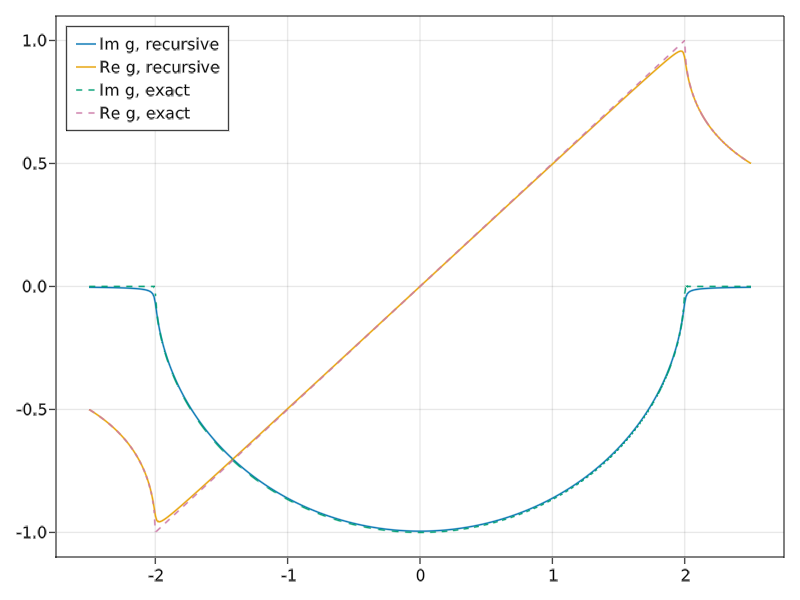

In [43]:
Es = range(-2.5, 2.5, length = 500)
gf = [recursive_leadgreensfunction(ABchain, E; niter = 1000, eta = 0.01) for E in Es];

lines(Es, [imag(g[1,1]) for g in gf], label = "Im g, recursive")
lines!(Es, [real(g[1,1]) for g in gf], label = "Re g, recursive")

lines!(Es, [imag(gr(E)) for E in Es], label = "Im g, exact", linestyle = :dash)
lines!(Es, [real(gr(E)) for E in Es], label = "Re g, exact", linestyle = :dash)
axislegend(position = :lt)
current_figure()

In [280]:
v = [0 1; 0 0]

2×2 Matrix{Int64}:
 0  1
 0  0

In [281]:
piv = pinv(v)

2×2 Matrix{Float64}:
 0.0  0.0
 1.0  0.0

In [283]:
v*piv

2×2 Matrix{Float64}:
 1.0  0.0
 0.0  0.0

In [285]:
A = [1 1; 1 -1]/sqrt(2)

2×2 Matrix{Float64}:
 0.707107   0.707107
 0.707107  -0.707107

In [289]:
pinv(v*A)*v*A

2×2 Matrix{Float64}:
  0.5  -0.5
 -0.5   0.5

In [290]:
v*A*pinv(v*A)

2×2 Matrix{Float64}:
 1.0  0.0
 0.0  0.0

In [159]:
states[1:1, 2]

1-element Vector{Float64}:
 0.0

In [81]:
vecs[:, 1]

2-element Vector{ComplexF64}:
   0.8208523846306905 - 0.0im
 -0.20521309615767264 - 0.7947869038423274im

In [72]:
A, B = leadstates(0.5, chain)

(ComplexF64[0.0 + 0.0im 1.0 + 0.0im; 1.0 + 0.0im 0.5 + 0.0im], ComplexF64[1.0 + 0.0im 0.0 + 0.0im; 0.0 + 0.0im -1.0 + 0.0im])

In [75]:
eigen(A, B)

GeneralizedEigen{ComplexF64, ComplexF64, Matrix{ComplexF64}, Vector{ComplexF64}}
values:
2-element Vector{ComplexF64}:
 -0.25 - 0.9682458365518543im
 -0.25 + 0.968245836551854im
vectors:
2×2 Matrix{ComplexF64}:
  0.820852+2.40908e-17im  9.35917e-17+0.820852im
 -0.205213-0.794787im       -0.794787-0.205213im

In [74]:
B

2×2 Matrix{ComplexF64}:
 1.0+0.0im   0.0+0.0im
 0.0+0.0im  -1.0+0.0im